In [1]:
#!pip install -U kaleido

Importing the libraries 

In [2]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime
import plotly.graph_objects as pgo
from IPython.display import Image

Reading the combined dataset which we obtained in the stage_1

In [3]:
long_covid = pd.read_csv('../../../../data/stage_1/long_large_covid.csv')
long_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0,0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0,0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0,0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


In [4]:
long_covid.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Date           object
Cases           int64
Death           int64
Population      int64
dtype: object

Converting the dtype of date from object into datetime

In [5]:
long_covid['Date'] = long_covid.Date.apply(lambda day: datetime.strptime(day, "%Y-%m-%d"))

Removing the rows whose County Name is Statewide Unallocated

In [6]:
long_covid = long_covid[long_covid['County Name']!= 'Statewide Unallocated']
long_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
573,1001,Autauga County,AL,1,2020-01-22,0,0,55869
574,1001,Autauga County,AL,1,2020-01-23,0,0,55869
575,1001,Autauga County,AL,1,2020-01-24,0,0,55869
576,1001,Autauga County,AL,1,2020-01-25,0,0,55869
577,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


### 1. Chosen state is NC

Taking the data of the state NC from original dataframe to another inorder to perform the analysis

In [7]:
nc_long_covid = long_covid[long_covid.State == 'NC']

In [8]:
nc_long_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1102452,37001,Alamance County,NC,37,2020-01-22,0,0,169509
1102453,37001,Alamance County,NC,37,2020-01-23,0,0,169509
1102454,37001,Alamance County,NC,37,2020-01-24,0,0,169509
1102455,37001,Alamance County,NC,37,2020-01-25,0,0,169509
1102456,37001,Alamance County,NC,37,2020-01-26,0,0,169509
...,...,...,...,...,...,...,...,...
1159747,37199,Yancey County,NC,37,2021-08-12,1864,28,18069
1159748,37199,Yancey County,NC,37,2021-08-13,1868,28,18069
1159749,37199,Yancey County,NC,37,2021-08-14,1868,28,18069
1159750,37199,Yancey County,NC,37,2021-08-15,1868,28,18069


Selecting the required columns which are used for calculating statistics 

In [9]:
nc_long_covid_1 = nc_long_covid[['County Name', 'Date', 'Cases', 'Death','Population']]
nc_long_covid_1

,County Name,Date,Cases,Death,Population
1102452,Alamance County,2020-01-22,0,0,169509
1102453,Alamance County,2020-01-23,0,0,169509
1102454,Alamance County,2020-01-24,0,0,169509
1102455,Alamance County,2020-01-25,0,0,169509
1102456,Alamance County,2020-01-26,0,0,169509
...,...,...,...,...,...
1159747,Yancey County,2021-08-12,1864,28,18069
1159748,Yancey County,2021-08-13,1868,28,18069
1159749,Yancey County,2021-08-14,1868,28,18069
1159750,Yancey County,2021-08-15,1868,28,18069


Calculating the sum of the Cases,Death and population to obtain the cummulative cases,death across the NC grouping by date

In [10]:
nc_long_covid_cases = nc_long_covid_1.groupby('Date').sum().reset_index()
nc_long_covid_cases

,Date,Cases,Death,Population
0,2020-01-22,0,0,10488084
1,2020-01-23,0,0,10488084
2,2020-01-24,0,0,10488084
3,2020-01-25,0,0,10488084
4,2020-01-26,0,0,10488084
...,...,...,...,...
568,2021-08-12,1100775,13806,10488084
569,2021-08-13,1107306,13826,10488084
570,2021-08-14,1107306,13826,10488084
571,2021-08-15,1107306,13826,10488084


To obtain the individual day new Cases, new Death we are using diff function on Cases and Death column

In [11]:
nc_long_covid_cases['Cases']= nc_long_covid_cases['Cases'].diff()
nc_long_covid_cases['Death']= nc_long_covid_cases['Death'].diff()
nc_long_covid_cases

,Date,Cases,Death,Population
0,2020-01-22,NaN,NaN,10488084
1,2020-01-23,0.0,0.0,10488084
2,2020-01-24,0.0,0.0,10488084
3,2020-01-25,0.0,0.0,10488084
4,2020-01-26,0.0,0.0,10488084
...,...,...,...,...
568,2021-08-12,5889.0,16.0,10488084
569,2021-08-13,6531.0,20.0,10488084
570,2021-08-14,0.0,0.0,10488084
571,2021-08-15,0.0,0.0,10488084


Removing the record of the first date as it results in NaN after difference and renaming the columns of Cases and Death into new_cases and new_deaths

In [12]:
nc_long_covid_cases = nc_long_covid_cases[nc_long_covid_cases.Date!= '2020-01-22']
nc_long_covid_cases.rename(columns={"Cases":"new_cases","Death":"new_deaths"}, inplace = True)
nc_long_covid_cases

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,new_cases,new_deaths,Population
1,2020-01-23,0.0,0.0,10488084
2,2020-01-24,0.0,0.0,10488084
3,2020-01-25,0.0,0.0,10488084
4,2020-01-26,0.0,0.0,10488084
5,2020-01-27,0.0,0.0,10488084
...,...,...,...,...
568,2021-08-12,5889.0,16.0,10488084
569,2021-08-13,6531.0,20.0,10488084
570,2021-08-14,0.0,0.0,10488084
571,2021-08-15,0.0,0.0,10488084


Normalize the new cases and new deaths by population of 100000

In [13]:
nc_long_covid_cases['Normalized_new_cases']= (nc_long_covid_cases['new_cases']/nc_long_covid_cases['Population'])*100000
nc_long_covid_cases['Normalized_new_deaths']= (nc_long_covid_cases['new_deaths']/nc_long_covid_cases['Population'])*100000
nc_long_covid_cases

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/1889091287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_long_covid_cases['Normalized_new_cases']= (nc_long_covid_cases['new_cases']/nc_long_covid_cases['Population'])*100000
/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/1889091287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_long_covid_cases['Normalized_new_deaths']= (nc_long_covid_cases['new_deaths']/nc_long_covid_cases['Population'])*100000


,Date,new_cases,new_deaths,Population,Normalized_new_cases,Normalized_new_deaths
1,2020-01-23,0.0,0.0,10488084,0.000000,0.000000
2,2020-01-24,0.0,0.0,10488084,0.000000,0.000000
3,2020-01-25,0.0,0.0,10488084,0.000000,0.000000
4,2020-01-26,0.0,0.0,10488084,0.000000,0.000000
5,2020-01-27,0.0,0.0,10488084,0.000000,0.000000
...,...,...,...,...,...,...
568,2021-08-12,5889.0,16.0,10488084,56.149436,0.152554
569,2021-08-13,6531.0,20.0,10488084,62.270668,0.190693
570,2021-08-14,0.0,0.0,10488084,0.000000,0.000000
571,2021-08-15,0.0,0.0,10488084,0.000000,0.000000


Converting the individual day Normalized new cases, Normalized new deaths count into weekly Normalized_new_cases and Normalized new deaths count to obtain the weekly statistics of the NC state

In [14]:
nc_weekly = nc_long_covid_cases.groupby([pd.Grouper(key='Date', freq='w')])['Normalized_new_cases','Normalized_new_deaths'].agg({'Normalized_new_cases':'mean','Normalized_new_deaths' :'mean'}).reset_index().round()

nc_weekly

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/2962529755.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nc_weekly = nc_long_covid_cases.groupby([pd.Grouper(key='Date', freq='w')])['Normalized_new_cases','Normalized_new_deaths'].agg({'Normalized_new_cases':'mean','Normalized_new_deaths' :'mean'}).reset_index().round()


,Date,Normalized_new_cases,Normalized_new_deaths
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,12.0,0.0
79,2021-08-01,22.0,0.0
80,2021-08-08,31.0,0.0
81,2021-08-15,49.0,0.0


Calculating the mean for the weekly Normalized_new_cases

In [15]:
nc_weekly['Normalized_new_cases'].mean()

19.951807228915662

Calculating the median for the weekly Normalized_new_cases

In [16]:
nc_weekly['Normalized_new_cases'].median()

15.0

Calculating the mode for the weekly Normalized_new_cases

In [17]:
nc_weekly['Normalized_new_cases'].mode()

0    0.0
dtype: float64

Calculating the mean for the weekly Normalized_new_deaths

In [18]:
nc_weekly['Normalized_new_deaths'].mean()

0.14457831325301204

Calculating the median for the weekly Normalized_new_deaths

In [19]:
nc_weekly['Normalized_new_deaths'].median()

0.0

Calculating the mode for the weekly Normalized_new_deaths

In [20]:
nc_weekly['Normalized_new_deaths'].mode()

0    0.0
dtype: float64

In [21]:
nc_weekly_1 = nc_long_covid_cases.groupby([pd.Grouper(key='Date', freq='w')])['new_cases','new_deaths'].agg({'new_cases':'mean','new_deaths' :'mean'}).reset_index().round()

nc_weekly_1

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/2124244427.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nc_weekly_1 = nc_long_covid_cases.groupby([pd.Grouper(key='Date', freq='w')])['new_cases','new_deaths'].agg({'new_cases':'mean','new_deaths' :'mean'}).reset_index().round()


,Date,new_cases,new_deaths
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,1293.0,7.0
79,2021-08-01,2307.0,9.0
80,2021-08-08,3294.0,14.0
81,2021-08-15,5167.0,13.0


Calculating the mean for the weekly new_cases

In [22]:
nc_weekly_1['new_cases'].mean()

2087.759036144578

Calculating the median for the weekly new_cases

In [23]:
nc_weekly_1['new_cases'].median()

1522.0

Calculating the mode for the weekly new_cases

In [24]:
nc_weekly_1['new_cases'].mode()

0    0.0
dtype: float64

Calculating the mean for the weekly new_deaths

In [25]:
nc_weekly_1['new_deaths'].mean()

24.457831325301203

Calculating the median for the weekly new_deaths

In [26]:
nc_weekly_1['new_deaths'].median()

18.0

Calculating the mode for the weekly new_deaths

In [27]:
nc_weekly_1['new_deaths'].mode()

0    0.0
dtype: float64

### 2. Compare against 5 other States

Selected states: California, Florida, New York, South Carolina, Texas, North Carolina

Moving the data related to the above five states into a dataframe

In [28]:
selected_states = long_covid[long_covid['State'].isin(['CA','FL','NY','SC','TX','NC'])]
selected_states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
109443,6001,Alameda County,CA,6,2020-01-22,0,0,1671329
109444,6001,Alameda County,CA,6,2020-01-23,0,0,1671329
109445,6001,Alameda County,CA,6,2020-01-24,0,0,1671329
109446,6001,Alameda County,CA,6,2020-01-25,0,0,1671329
109447,6001,Alameda County,CA,6,2020-01-26,0,0,1671329
...,...,...,...,...,...,...,...,...
1616428,48507,Zavala County,TX,48,2021-08-12,2010,43,11840
1616429,48507,Zavala County,TX,48,2021-08-13,2025,43,11840
1616430,48507,Zavala County,TX,48,2021-08-14,2041,43,11840
1616431,48507,Zavala County,TX,48,2021-08-15,2041,43,11840


Selecting the required columns from the above dataframes

In [29]:
selected_states_1 = selected_states[['County Name', 'State','Date', 'Cases', 'Death','Population']]
selected_states_1

,County Name,State,Date,Cases,Death,Population
109443,Alameda County,CA,2020-01-22,0,0,1671329
109444,Alameda County,CA,2020-01-23,0,0,1671329
109445,Alameda County,CA,2020-01-24,0,0,1671329
109446,Alameda County,CA,2020-01-25,0,0,1671329
109447,Alameda County,CA,2020-01-26,0,0,1671329
...,...,...,...,...,...,...
1616428,Zavala County,TX,2021-08-12,2010,43,11840
1616429,Zavala County,TX,2021-08-13,2025,43,11840
1616430,Zavala County,TX,2021-08-14,2041,43,11840
1616431,Zavala County,TX,2021-08-15,2041,43,11840


Calculating sum of cases,Death and population grouping by state and Date

In [30]:
selected_states_cases = selected_states_1.groupby(['State','Date']).sum().reset_index()
selected_states_cases

,State,Date,Cases,Death,Population
0,CA,2020-01-22,0,0,39512223
1,CA,2020-01-23,0,0,39512223
2,CA,2020-01-24,0,0,39512223
3,CA,2020-01-25,0,0,39512223
4,CA,2020-01-26,2,0,39512223
...,...,...,...,...,...
3433,TX,2021-08-12,3278469,52768,28995881
3434,TX,2021-08-13,3292180,52912,28995881
3435,TX,2021-08-14,3318801,53029,28995881
3436,TX,2021-08-15,3323973,53072,28995881


Calculating the new cases and new deaths of the individual date by using diff function

In [31]:
selected_states_cases['new_cases'] = selected_states_cases['Cases'].diff()
selected_states_cases['new_deaths'] = selected_states_cases['Death'].diff()
selected_states_cases

,State,Date,Cases,Death,Population,new_cases,new_deaths
0,CA,2020-01-22,0,0,39512223,NaN,NaN
1,CA,2020-01-23,0,0,39512223,0.0,0.0
2,CA,2020-01-24,0,0,39512223,0.0,0.0
3,CA,2020-01-25,0,0,39512223,0.0,0.0
4,CA,2020-01-26,2,0,39512223,2.0,0.0
...,...,...,...,...,...,...,...
3433,TX,2021-08-12,3278469,52768,28995881,15186.0,120.0
3434,TX,2021-08-13,3292180,52912,28995881,13711.0,144.0
3435,TX,2021-08-14,3318801,53029,28995881,26621.0,117.0
3436,TX,2021-08-15,3323973,53072,28995881,5172.0,43.0


In [32]:
selected_states_cases = selected_states_cases[selected_states_cases.Date!= '2020-01-22']
selected_states_cases

,State,Date,Cases,Death,Population,new_cases,new_deaths
1,CA,2020-01-23,0,0,39512223,0.0,0.0
2,CA,2020-01-24,0,0,39512223,0.0,0.0
3,CA,2020-01-25,0,0,39512223,0.0,0.0
4,CA,2020-01-26,2,0,39512223,2.0,0.0
5,CA,2020-01-27,3,0,39512223,1.0,0.0
...,...,...,...,...,...,...,...
3433,TX,2021-08-12,3278469,52768,28995881,15186.0,120.0
3434,TX,2021-08-13,3292180,52912,28995881,13711.0,144.0
3435,TX,2021-08-14,3318801,53029,28995881,26621.0,117.0
3436,TX,2021-08-15,3323973,53072,28995881,5172.0,43.0


Normalize the new_cases and new_deaths by population per 100000

In [33]:
selected_states_cases["Normalized_new_cases"] = (selected_states_cases["new_cases"]/selected_states_cases["Population"])*100000
selected_states_cases["Normalized_new_deaths"] = (selected_states_cases["new_deaths"]/selected_states_cases["Population"])*100000
selected_states_cases

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/3989481356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_states_cases["Normalized_new_cases"] = (selected_states_cases["new_cases"]/selected_states_cases["Population"])*100000
/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/3989481356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_states_cases["Normalized_new_deaths"] = (selected_states_cases["new_deaths"]/selected_states_cases["Population"])*10000

,State,Date,Cases,Death,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
1,CA,2020-01-23,0,0,39512223,0.0,0.0,0.000000,0.000000
2,CA,2020-01-24,0,0,39512223,0.0,0.0,0.000000,0.000000
3,CA,2020-01-25,0,0,39512223,0.0,0.0,0.000000,0.000000
4,CA,2020-01-26,2,0,39512223,2.0,0.0,0.005062,0.000000
5,CA,2020-01-27,3,0,39512223,1.0,0.0,0.002531,0.000000
...,...,...,...,...,...,...,...,...,...
3433,TX,2021-08-12,3278469,52768,28995881,15186.0,120.0,52.372956,0.413852
3434,TX,2021-08-13,3292180,52912,28995881,13711.0,144.0,47.286027,0.496622
3435,TX,2021-08-14,3318801,53029,28995881,26621.0,117.0,91.809592,0.403506
3436,TX,2021-08-15,3323973,53072,28995881,5172.0,43.0,17.837016,0.148297


Converting the daily Normalized_new_cases and Normalized_new_deaths into weekly 

In [34]:
selected_states_weekly= selected_states_cases.groupby('State').resample('W', on='Date').mean().reset_index().sort_values(by=['State','Date'])
selected_states_weekly

,State,Date,Cases,Death,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
0,CA,2020-01-26,5.000000e-01,0.000000,39512223.0,0.500000,0.000000,0.001265,0.000000
1,CA,2020-02-02,3.714286e+00,0.000000,39512223.0,0.285714,0.000000,0.000723,0.000000
2,CA,2020-02-09,6.000000e+00,0.571429,39512223.0,0.285714,0.142857,0.000723,0.000362
3,CA,2020-02-16,7.428571e+00,1.000000,39512223.0,0.285714,0.000000,0.000723,0.000000
4,CA,2020-02-23,1.014286e+01,2.000000,39512223.0,0.571429,0.142857,0.001446,0.000362
...,...,...,...,...,...,...,...,...,...
493,TX,2021-07-25,3.048225e+06,51733.714286,28995881.0,5112.571429,28.000000,17.632061,0.096565
494,TX,2021-08-01,3.099069e+06,51967.142857,28995881.0,9004.142857,36.857143,31.053179,0.127112
495,TX,2021-08-08,3.181372e+06,52274.857143,28995881.0,13854.285714,51.000000,47.780185,0.175887
496,TX,2021-08-15,3.278479e+06,52773.857143,28995881.0,14127.285714,89.714286,48.721698,0.309404


Selecting the required columns from the above dataframe

In [35]:
selected_states_weekly_1 = selected_states_weekly[['State','Date','Normalized_new_cases','Normalized_new_deaths']]
selected_states_weekly_1

,State,Date,Normalized_new_cases,Normalized_new_deaths
0,CA,2020-01-26,0.001265,0.000000
1,CA,2020-02-02,0.000723,0.000000
2,CA,2020-02-09,0.000723,0.000362
3,CA,2020-02-16,0.000723,0.000000
4,CA,2020-02-23,0.001446,0.000362
...,...,...,...,...
493,TX,2021-07-25,17.632061,0.096565
494,TX,2021-08-01,31.053179,0.127112
495,TX,2021-08-08,47.780185,0.175887
496,TX,2021-08-15,48.721698,0.309404


Calculating the mean and median of Normalized_new_cases grouping by State

In [36]:
selected_states_weekly_1_cases = selected_states_weekly_1.groupby('State')['Normalized_new_cases'].agg(['mean','median']).reset_index()
selected_states_weekly_1_cases

,State,mean,median
0,CA,18.598905,8.224941
1,FL,23.057242,16.455578
2,NC,19.905846,14.507621
3,NY,19.586660,9.408487
4,SC,24.523143,16.819734
5,TX,19.973268,13.540347


From the above we can observe that the mean of weekly Normalized_new_cases is more for South Carolina followed by Florida and the mean is least for California.

Median of Weekly Normalized_new_cases is more for South Carolina followed by Florida and it is least for California

Calculating the mean and median of Normalized_new_deaths grouping by State

In [37]:
selected_states_weekly_1_deaths = selected_states_weekly_1.groupby('State')['Normalized_new_deaths'].agg(['mean','median']).reset_index()
selected_states_weekly_1_deaths

,State,mean,median
0,CA,0.281679,0.173545
1,FL,0.296292,0.262065
2,NC,0.233098,0.174348
3,NY,0.474664,0.182119
4,SC,0.351741,0.246941
5,TX,0.315405,0.197072


From the above we can observe that the mean of weekly Normalized_new_deaths is more for the New York followed by South Carolina. But median is more for florida

Plotting the line plot for Date and Weekly Normalized new Cases across the 6 States

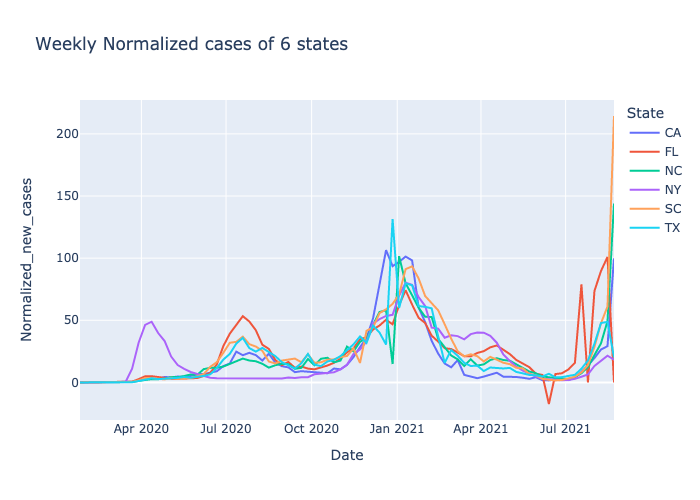

In [38]:
fig1_plot = px.line(selected_states_weekly_1, x ='Date', y='Normalized_new_cases', color='State',title ='Weekly Normalized cases of 6 states')
#normalized_cases_plot.show()
fig1_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig1_plot.png')
f1 = fig1_plot.to_image(format="png")
Image(f1)


From the above plot we can come to know the rates differ across different states as Normalization is done based on the population in that particular state. If population is more than there is more chance of spreading the cases. If population is less than there is less chance of getting effected.

Plotting the plot line for Date and Weekly normalized_new_deaths across 6 States

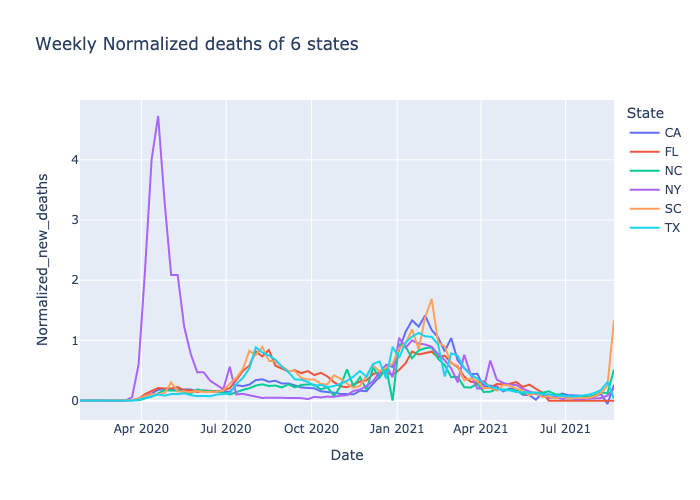

In [39]:
fig2_plot = px.line(selected_states_weekly_1, x ='Date', y='Normalized_new_deaths', color='State',title ='Weekly Normalized deaths of 6 states')
#normalized_deaths_plot.show()
fig2_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig2_plot.png')
f2 = fig2_plot.to_image(format="png")
Image(f2)

From the above plot we can observe that the death rate is almost same across the different states. But for the new york state we can observe that there is huge spike in between april 2020 to june 2020. It may be due to lack of medical facilities at that particular time. Or their might be any chance of dangerous variant from other countries as it one of the port of entry. 

### 3. Identify five counties with high cases and death rates in NC state

Move the data of State NC into separate dataframe

In [40]:
nc_county_covid = long_covid[long_covid.State == 'NC']
nc_county_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1102452,37001,Alamance County,NC,37,2020-01-22,0,0,169509
1102453,37001,Alamance County,NC,37,2020-01-23,0,0,169509
1102454,37001,Alamance County,NC,37,2020-01-24,0,0,169509
1102455,37001,Alamance County,NC,37,2020-01-25,0,0,169509
1102456,37001,Alamance County,NC,37,2020-01-26,0,0,169509
...,...,...,...,...,...,...,...,...
1159747,37199,Yancey County,NC,37,2021-08-12,1864,28,18069
1159748,37199,Yancey County,NC,37,2021-08-13,1868,28,18069
1159749,37199,Yancey County,NC,37,2021-08-14,1868,28,18069
1159750,37199,Yancey County,NC,37,2021-08-15,1868,28,18069


Finding the new_cases and new_deaths across the counties in NC using the diff function and removing the data related to 22-01-2020 as it results in NaN

In [41]:
nc_county_covid['new_cases'] = nc_county_covid['Cases'].diff()
nc_county_covid['new_deaths']= nc_county_covid['Death'].diff()
nc_county_covid = nc_county_covid[nc_county_covid.Date!= '2020-01-22']
nc_county_covid

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/79545969.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/79545969.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,new_cases,new_deaths
1102453,37001,Alamance County,NC,37,2020-01-23,0,0,169509,0.0,0.0
1102454,37001,Alamance County,NC,37,2020-01-24,0,0,169509,0.0,0.0
1102455,37001,Alamance County,NC,37,2020-01-25,0,0,169509,0.0,0.0
1102456,37001,Alamance County,NC,37,2020-01-26,0,0,169509,0.0,0.0
1102457,37001,Alamance County,NC,37,2020-01-27,0,0,169509,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1159747,37199,Yancey County,NC,37,2021-08-12,1864,28,18069,29.0,0.0
1159748,37199,Yancey County,NC,37,2021-08-13,1868,28,18069,4.0,0.0
1159749,37199,Yancey County,NC,37,2021-08-14,1868,28,18069,0.0,0.0
1159750,37199,Yancey County,NC,37,2021-08-15,1868,28,18069,0.0,0.0


Calculating the sum of new_cases and new_deaths grouping by countyFIPS, County Name, Population

In [42]:
nc_county_covid_1 = nc_county_covid.groupby(['countyFIPS','County Name','Population'])[['new_cases','new_deaths']].agg('sum').reset_index()
nc_county_covid_1

,countyFIPS,County Name,Population,new_cases,new_deaths
0,37001,Alamance County,169509,20380.0,289.0
1,37003,Alexander County,37497,4869.0,85.0
2,37005,Alleghany County,11137,1143.0,5.0
3,37007,Anson County,24446,2847.0,57.0
4,37009,Ashe County,27203,2456.0,45.0
...,...,...,...,...,...
95,37191,Wayne County,123131,12491.0,247.0
96,37193,Wilkes County,68412,7813.0,119.0
97,37195,Wilson County,81801,10502.0,186.0
98,37197,Yadkin County,37667,4541.0,56.0


Normalize the new_cases and new_deaths across the counties by population per 10000

In [43]:
nc_county_covid_1['Normalized_new_cases'] = round((nc_county_covid_1['new_cases']/nc_county_covid_1['Population'])*10000)
nc_county_covid_1['Normalized_new_deaths'] = round((nc_county_covid_1['new_deaths']/nc_county_covid_1['Population'])*10000)
nc_county_covid_1

,countyFIPS,County Name,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
0,37001,Alamance County,169509,20380.0,289.0,1202.0,17.0
1,37003,Alexander County,37497,4869.0,85.0,1299.0,23.0
2,37005,Alleghany County,11137,1143.0,5.0,1026.0,4.0
3,37007,Anson County,24446,2847.0,57.0,1165.0,23.0
4,37009,Ashe County,27203,2456.0,45.0,903.0,17.0
...,...,...,...,...,...,...,...
95,37191,Wayne County,123131,12491.0,247.0,1014.0,20.0
96,37193,Wilkes County,68412,7813.0,119.0,1142.0,17.0
97,37195,Wilson County,81801,10502.0,186.0,1284.0,23.0
98,37197,Yadkin County,37667,4541.0,56.0,1206.0,15.0


Top 5 counties with highest Normalized_new_cases in NC i.e., high infected rate

In [44]:
nc_county_covid_1.sort_values(by=['Normalized_new_cases'],ascending=False).head()

,countyFIPS,County Name,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
77,37155,Robeson County,130625,19542.0,295.0,1496.0,23.0
81,37163,Sampson County,63531,8976.0,115.0,1413.0,18.0
47,37095,Hyde County,4937,690.0,9.0,1398.0,18.0
83,37167,Stanly County,62806,8716.0,142.0,1388.0,23.0
23,37047,Columbus County,55508,7697.0,162.0,1387.0,29.0


The top 5 counties in NC with high cases are:

- Robeson County
- Sampson County
- Hyde County
- Stanly County
- Columbus County

Top 5 counties with highest Normalized_new_deaths in NC i.e., death rate

In [45]:
nc_county_covid_1.sort_values(by=['Normalized_new_deaths'],ascending=False).head()

,countyFIPS,County Name,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
61,37123,Montgomery County,27173,3609.0,97.0,1328.0,36.0
80,37161,Rutherford County,67029,8270.0,225.0,1234.0,34.0
65,37131,Northampton County,19483,1994.0,61.0,1023.0,31.0
51,37103,Jones County,9419,969.0,29.0,1029.0,31.0
23,37047,Columbus County,55508,7697.0,162.0,1387.0,29.0


The top 5 counties in NC with high death rate are:
- Montgomery County
- Rutherford County
- Northampton County
- Jones County
- Columbus County

### 4. Plot the weekly trends for the top five infected counties

In [46]:
nc_county_covid_weekly = long_covid[long_covid.State == 'NC']
nc_county_covid_weekly

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1102452,37001,Alamance County,NC,37,2020-01-22,0,0,169509
1102453,37001,Alamance County,NC,37,2020-01-23,0,0,169509
1102454,37001,Alamance County,NC,37,2020-01-24,0,0,169509
1102455,37001,Alamance County,NC,37,2020-01-25,0,0,169509
1102456,37001,Alamance County,NC,37,2020-01-26,0,0,169509
...,...,...,...,...,...,...,...,...
1159747,37199,Yancey County,NC,37,2021-08-12,1864,28,18069
1159748,37199,Yancey County,NC,37,2021-08-13,1868,28,18069
1159749,37199,Yancey County,NC,37,2021-08-14,1868,28,18069
1159750,37199,Yancey County,NC,37,2021-08-15,1868,28,18069


From the above task 3 the top 5 infected counties are:

Robeson County,
Sampson County,
Hyde County,
Stanly County,
Columbus County


In [47]:
nc_county_covid_weekly_1 = nc_county_covid_weekly[nc_county_covid_weekly['countyFIPS'].isin([37155,37163,37095,37167,37047])]
nc_county_covid_weekly_1

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1115631,37047,Columbus County,NC,37,2020-01-22,0,0,55508
1115632,37047,Columbus County,NC,37,2020-01-23,0,0,55508
1115633,37047,Columbus County,NC,37,2020-01-24,0,0,55508
1115634,37047,Columbus County,NC,37,2020-01-25,0,0,55508
1115635,37047,Columbus County,NC,37,2020-01-26,0,0,55508
...,...,...,...,...,...,...,...,...
1150579,37167,Stanly County,NC,37,2021-08-12,8529,141,62806
1150580,37167,Stanly County,NC,37,2021-08-13,8579,141,62806
1150581,37167,Stanly County,NC,37,2021-08-14,8579,141,62806
1150582,37167,Stanly County,NC,37,2021-08-15,8579,141,62806


Selecting the required columns from the above dataframe

In [48]:
nc_county_covid_weekly_2= nc_county_covid_weekly_1[['countyFIPS','County Name','Date', 'Cases', 'Death','Population']]
nc_county_covid_weekly_2

,countyFIPS,County Name,Date,Cases,Death,Population
1115631,37047,Columbus County,2020-01-22,0,0,55508
1115632,37047,Columbus County,2020-01-23,0,0,55508
1115633,37047,Columbus County,2020-01-24,0,0,55508
1115634,37047,Columbus County,2020-01-25,0,0,55508
1115635,37047,Columbus County,2020-01-26,0,0,55508
...,...,...,...,...,...,...
1150579,37167,Stanly County,2021-08-12,8529,141,62806
1150580,37167,Stanly County,2021-08-13,8579,141,62806
1150581,37167,Stanly County,2021-08-14,8579,141,62806
1150582,37167,Stanly County,2021-08-15,8579,141,62806


Calculating the individual date new cases, new deaths by using the diff function and removing the data related to the date 22-01-2020

In [49]:
nc_county_covid_weekly_2['new_cases'] = nc_county_covid_weekly_2['Cases'].diff()
nc_county_covid_weekly_2['new_deaths']= nc_county_covid_weekly_2['Death'].diff()
nc_county_covid_weekly_2 = nc_county_covid_weekly_2[nc_county_covid_weekly_2.Date!= '2020-01-22']
nc_county_covid_weekly_2

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/2921868723.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,Date,Cases,Death,Population,new_cases,new_deaths
1115632,37047,Columbus County,2020-01-23,0,0,55508,0.0,0.0
1115633,37047,Columbus County,2020-01-24,0,0,55508,0.0,0.0
1115634,37047,Columbus County,2020-01-25,0,0,55508,0.0,0.0
1115635,37047,Columbus County,2020-01-26,0,0,55508,0.0,0.0
1115636,37047,Columbus County,2020-01-27,0,0,55508,0.0,0.0
...,...,...,...,...,...,...,...,...
1150579,37167,Stanly County,2021-08-12,8529,141,62806,37.0,0.0
1150580,37167,Stanly County,2021-08-13,8579,141,62806,50.0,0.0
1150581,37167,Stanly County,2021-08-14,8579,141,62806,0.0,0.0
1150582,37167,Stanly County,2021-08-15,8579,141,62806,0.0,0.0


Normalize the new_cases, new_deaths by population per 10000

In [50]:
nc_county_covid_weekly_2["Normalized_new_cases"] = (nc_county_covid_weekly_2["new_cases"]/nc_county_covid_weekly_2["Population"])*10000
nc_county_covid_weekly_2["Normalized_new_deaths"] = (nc_county_covid_weekly_2["new_deaths"]/nc_county_covid_weekly_2["Population"])*10000
nc_county_covid_weekly_2

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/3442544899.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/d0z8tvws1d3fd6zmyfthqwv40000gn/T/ipykernel_53138/3442544899.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,Date,Cases,Death,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
1115632,37047,Columbus County,2020-01-23,0,0,55508,0.0,0.0,0.000000,0.00000
1115633,37047,Columbus County,2020-01-24,0,0,55508,0.0,0.0,0.000000,0.00000
1115634,37047,Columbus County,2020-01-25,0,0,55508,0.0,0.0,0.000000,0.00000
1115635,37047,Columbus County,2020-01-26,0,0,55508,0.0,0.0,0.000000,0.00000
1115636,37047,Columbus County,2020-01-27,0,0,55508,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1150579,37167,Stanly County,2021-08-12,8529,141,62806,37.0,0.0,5.891157,0.00000
1150580,37167,Stanly County,2021-08-13,8579,141,62806,50.0,0.0,7.961023,0.00000
1150581,37167,Stanly County,2021-08-14,8579,141,62806,0.0,0.0,0.000000,0.00000
1150582,37167,Stanly County,2021-08-15,8579,141,62806,0.0,0.0,0.000000,0.00000


Converting the daily data into weekly grouping by County Name

In [51]:
nc_county_covid_weekly_3= nc_county_covid_weekly_2.groupby(['County Name']).resample('W', on='Date').mean().reset_index().sort_values(by=['County Name','Date'])
nc_county_covid_weekly_3

,County Name,Date,countyFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
0,Columbus County,2020-01-26,37047.0,0.000000,0.0,55508.0,0.000000,0.000000,0.000000,0.000000
1,Columbus County,2020-02-02,37047.0,0.000000,0.0,55508.0,0.000000,0.000000,0.000000,0.000000
2,Columbus County,2020-02-09,37047.0,0.000000,0.0,55508.0,0.000000,0.000000,0.000000,0.000000
3,Columbus County,2020-02-16,37047.0,0.000000,0.0,55508.0,0.000000,0.000000,0.000000,0.000000
4,Columbus County,2020-02-23,37047.0,0.000000,0.0,55508.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
410,Stanly County,2021-07-25,37167.0,8014.571429,138.0,62806.0,8.000000,0.000000,1.273764,0.000000
411,Stanly County,2021-08-01,37167.0,8118.000000,138.0,62806.0,16.428571,0.000000,2.615765,0.000000
412,Stanly County,2021-08-08,37167.0,8295.142857,138.0,62806.0,27.142857,0.000000,4.321698,0.000000
413,Stanly County,2021-08-15,37167.0,8521.285714,141.0,62806.0,34.571429,0.428571,5.504479,0.068237


Selecting the required columns from the above dataframe

In [52]:
nc_county_covid_weekly_final = nc_county_covid_weekly_3[['County Name','Date','Cases','Death','new_cases','new_deaths','Normalized_new_cases','Normalized_new_deaths']]
nc_county_covid_weekly_final

,County Name,Date,Cases,Death,new_cases,new_deaths,Normalized_new_cases,Normalized_new_deaths
0,Columbus County,2020-01-26,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,Columbus County,2020-02-02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,Columbus County,2020-02-09,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Columbus County,2020-02-16,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,Columbus County,2020-02-23,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
410,Stanly County,2021-07-25,8014.571429,138.0,8.000000,0.000000,1.273764,0.000000
411,Stanly County,2021-08-01,8118.000000,138.0,16.428571,0.000000,2.615765,0.000000
412,Stanly County,2021-08-08,8295.142857,138.0,27.142857,0.000000,4.321698,0.000000
413,Stanly County,2021-08-15,8521.285714,141.0,34.571429,0.428571,5.504479,0.068237


Plotting the line plot for Date and new_cases across the top 5 infected counties in NC

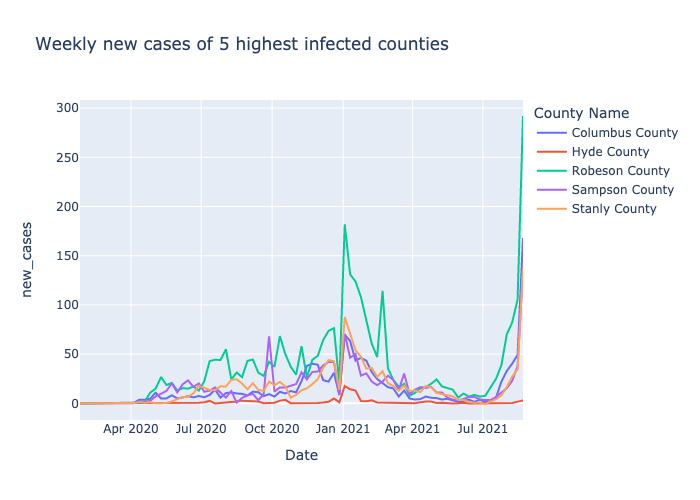

In [53]:
fig3_plot = px.line(nc_county_covid_weekly_final, x ='Date', y='new_cases', color='County Name',title ='Weekly new cases of 5 highest infected counties')
#fig3_plot.show()
fig3_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig3_plot.png')
f3 = fig3_plot.to_image(format="png")
Image(f3)

The covid cases increased suddenly across all these counties after Jan2021 as people came out from christmas vacation. So the spread was more after Jan 2021. Also due to less vaccination rate.

Plotting the line plot for Date and new_deaths across the top 5 infected counties in NC

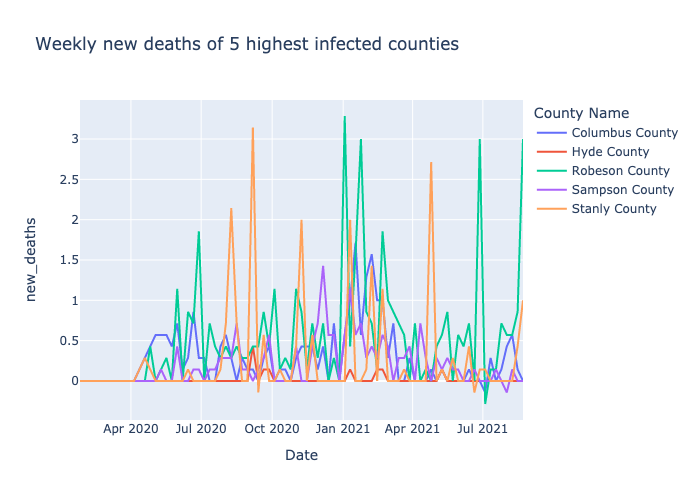

In [54]:
fig4_plot = px.line(nc_county_covid_weekly_final, x ='Date', y='new_deaths', color='County Name',title ='Weekly new deaths of 5 highest infected counties')
#fig3_plot.show()
fig4_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig4_plot.png')
f4 = fig4_plot.to_image(format="png")
Image(f4)

There were more deaths in the Stanly county as many old age people lives there. Even vaccination didn’t help many of them in this county. Also there are less medicare facilities available in that county. 

Plotting the line plot for Date and log normalized_new_cases values across top 5 infected counties in NC

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log



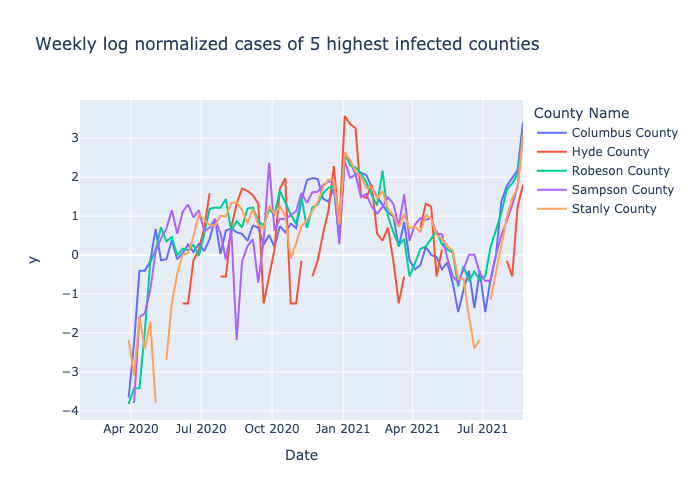

In [55]:
fig5_plot = px.line(nc_county_covid_weekly_final, x ='Date', y=np.log(nc_county_covid_weekly_final['Normalized_new_cases']), color='County Name',title ='Weekly log normalized cases of 5 highest infected counties')
#fig3_plot.show
fig5_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig5_plot.png')
f5 = fig5_plot.to_image(format="png")
Image(f5)

Plotting the line plot for Date and log normalized_new_deaths values across top 5 infected counties in NC

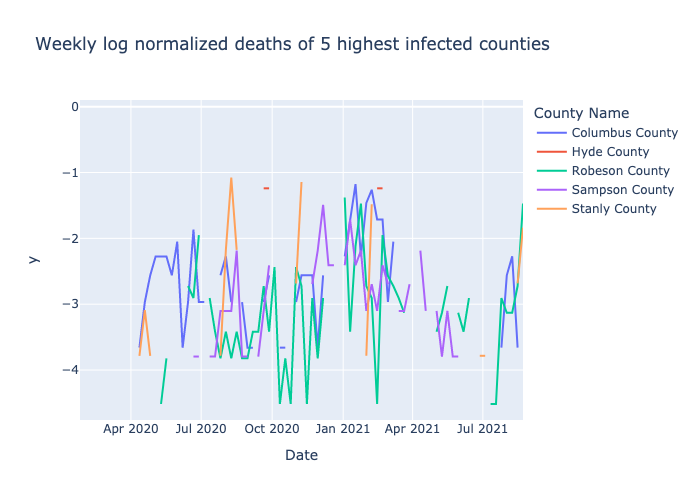

In [56]:
fig6_plot = px.line(nc_county_covid_weekly_final, x ='Date', y=np.log(nc_county_covid_weekly_final['Normalized_new_deaths']), color='County Name',title ='Weekly log normalized deaths of 5 highest infected counties')
#fig3_plot.show
fig6_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig6_plot.png')
f6 = fig6_plot.to_image(format="png")
Image(f6)

Plotting the line plot for Date and weekly Normalized_new_cases for NC State

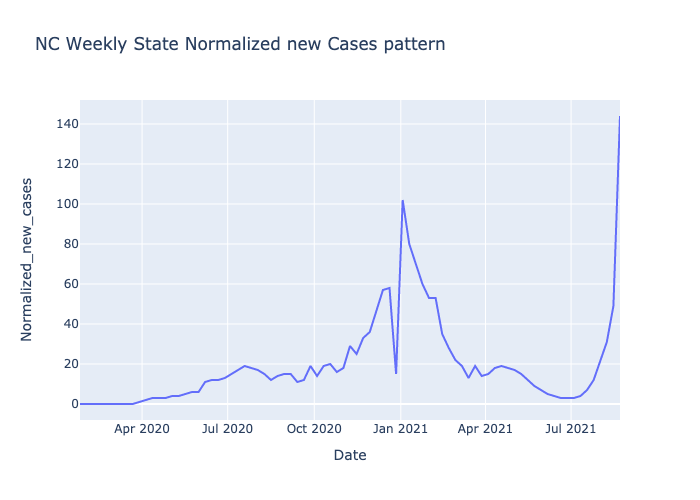

In [57]:
fig7_plot = px.line(nc_weekly, x ='Date', y='Normalized_new_cases',title ='NC Weekly State Normalized new Cases pattern')
#fig3_plot.show()
fig7_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig7_plot.png')
f7 = fig7_plot.to_image(format="png")
Image(f7)

Plotting the line plot for Date and weekly Normalized_new_deaths for NC State

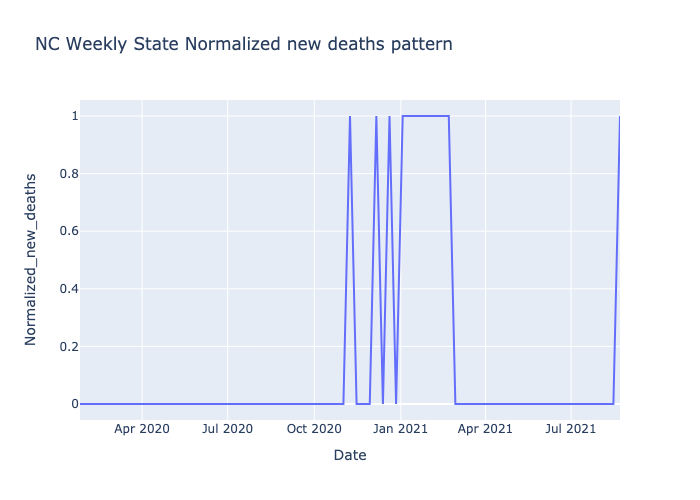

In [58]:
fig8_plot = px.line(nc_weekly, x ='Date', y='Normalized_new_deaths',title ='NC Weekly State Normalized new deaths pattern')
#fig3_plot.show()
fig8_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig8_plot.png')
f8 = fig8_plot.to_image(format="png")
Image(f8)

Plotting the line plot for Date and Weekly Normalized new cases across the top 5 infected counties in NC

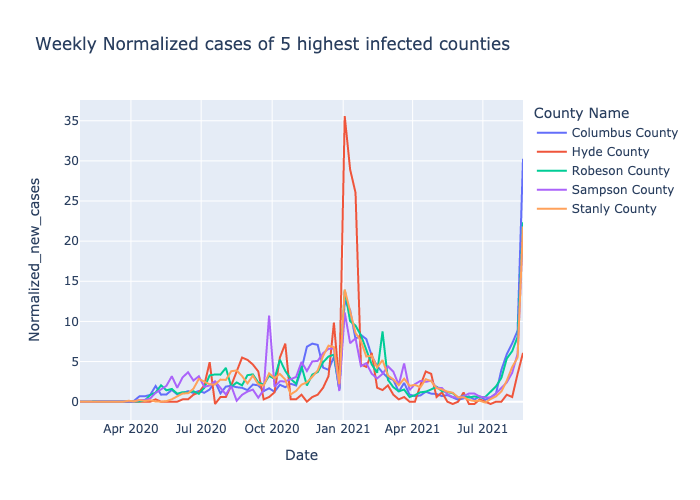

In [59]:
fig9_plot = px.line(nc_county_covid_weekly_final, x ='Date', y='Normalized_new_cases', color='County Name',title ='Weekly Normalized cases of 5 highest infected counties')
#fig3_plot.show()
fig9_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig9_plot.png')
f9 = fig9_plot.to_image(format="png")
Image(f9)

Plotting the line plot for Date and Weekly Normalized new deaths across the top 5 infected counties in NC

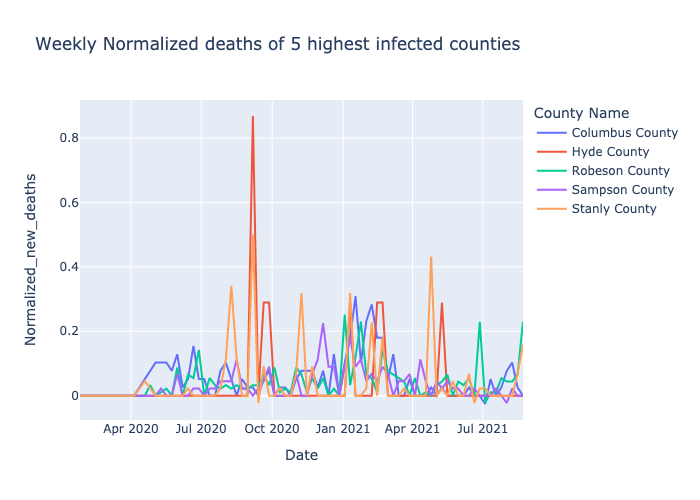

In [60]:
fig10_plot = px.line(nc_county_covid_weekly_final, x ='Date', y='Normalized_new_deaths', color='County Name',title ='Weekly Normalized deaths of 5 highest infected counties')
#fig3_plot.show()
fig10_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig10_plot.png')
f10 = fig10_plot.to_image(format="png")
Image(f10)

plotting the line plot for Date and weekly new cases across the NC state

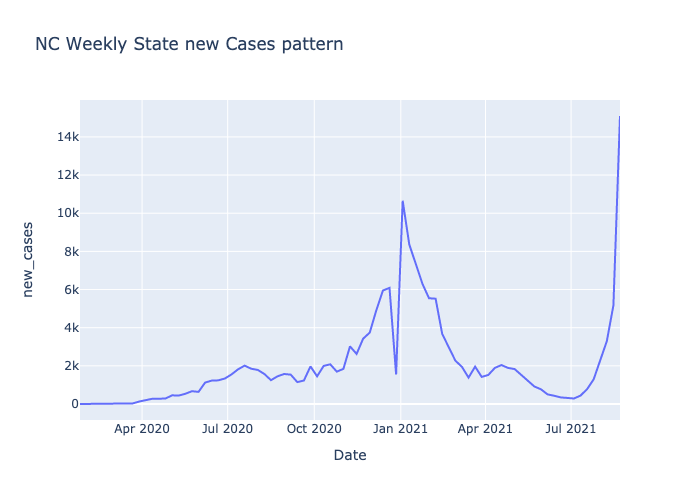

In [61]:
fig11_plot = px.line(nc_weekly_1, x ='Date', y='new_cases',title ='NC Weekly State new Cases pattern')
#fig3_plot.show()
fig11_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig11_plot.png')
f11 = fig11_plot.to_image(format="png")
Image(f11)

plotting the line plot for Date and weekly new deaths across the NC state

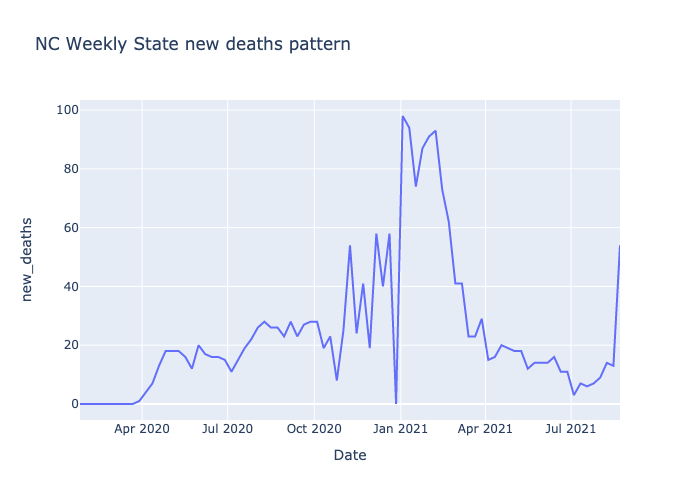

In [62]:
fig12_plot = px.line(nc_weekly_1, x ='Date', y='new_deaths',title ='NC Weekly State new deaths pattern')
#fig3_plot.show()
fig12_plot.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_2/fig12_plot.png')
f12 = fig12_plot.to_image(format="png")
Image(f12)